**Importing neccessary libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv('/content/Ecom_CRM_analysis (8).csv',encoding='latin-1')

In [9]:
df = dataset.copy()

loading data into df

In [10]:
df.shape

(541909, 8)

observing the top rows of data

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


getting to know the datatypes of data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


changing the datatypes to relevant types for analysis

In [13]:

df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('string')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('category')
df['Country'] = df['Country'].astype('category')

# After the changes, verify the datatypes
df.dtypes


,0
InvoiceNo,category
StockCode,category
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,category
Country,category


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# Extracting the time part and assigning it to a new column
df['TransactionTime'] = df['InvoiceDate'].dt.time

# Verifying the changes
df[['InvoiceDate', 'TransactionTime']].head()

,InvoiceDate,TransactionTime
0,2010-12-01 08:26:00,08:26:00
1,2010-12-01 08:26:00,08:26:00
2,2010-12-01 08:26:00,08:26:00
3,2010-12-01 08:26:00,08:26:00
4,2010-12-01 08:26:00,08:26:00


In [16]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

# Verifying the changes
df[['InvoiceDate', 'TransactionTime']].head()

,InvoiceDate,TransactionTime
0,2010-12-01,08:26:00
1,2010-12-01,08:26:00
2,2010-12-01,08:26:00
3,2010-12-01,08:26:00
4,2010-12-01,08:26:00


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00


In [18]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TransactionTime,0


In [19]:
#rows where description is null
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
622,536414,22139,<NA>,56,2010-12-01,0.0,NaN,United Kingdom,11:52:00
1970,536545,21134,<NA>,1,2010-12-01,0.0,NaN,United Kingdom,14:32:00
1971,536546,22145,<NA>,1,2010-12-01,0.0,NaN,United Kingdom,14:33:00
1972,536547,37509,<NA>,1,2010-12-01,0.0,NaN,United Kingdom,14:33:00
1987,536549,85226A,<NA>,1,2010-12-01,0.0,NaN,United Kingdom,14:34:00
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07,0.0,NaN,United Kingdom,18:26:00
535326,581203,23406,<NA>,15,2011-12-07,0.0,NaN,United Kingdom,18:31:00
535332,581209,21620,<NA>,6,2011-12-07,0.0,NaN,United Kingdom,18:35:00
536981,581234,72817,<NA>,27,2011-12-08,0.0,NaN,United Kingdom,10:33:00


In [21]:
# fill null values with 'Unknown' in Description Column

df['Description'] = df['Description'].fillna('Unknown')




In [22]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TransactionTime,0


In [24]:
# Adding 'Unknown' as a new category to the 'CustomerID' column
df['CustomerID'] = df['CustomerID'].cat.add_categories(['Unknown'])

# Now  fill null values with 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [25]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TransactionTime,0


<Axes: ylabel='UnitPrice'>

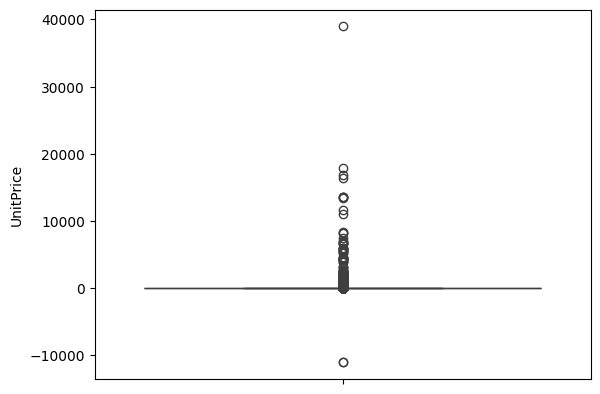

In [26]:
#Identifying the outliers for all values in UnitPrice Column in the data using seaborn library
sns.boxplot(df['UnitPrice'])

In [31]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
622,536414,22139,Unknown,56,2010-12-01,0.0,Unknown,United Kingdom,11:52:00
1970,536545,21134,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,14:32:00
1971,536546,22145,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,14:33:00
1972,536547,37509,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,14:33:00
1987,536549,85226A,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,14:34:00
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,Unknown,27,2011-12-08,0.0,Unknown,United Kingdom,10:33:00
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08,0.0,Unknown,United Kingdom,13:58:00
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08,0.0,Unknown,United Kingdom,13:58:00
538554,581408,85175,Unknown,20,2011-12-08,0.0,Unknown,United Kingdom,14:06:00


2515 rows of data is about the products that are free

In [27]:
df[(df['UnitPrice'] > 20000) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
222681,C556445,M,Manual,-1,2011-06-10,38970.0,15098.0,United Kingdom,15:31:00


In [ ]:
#outliers in quantity column of df
sns.boxplot(df['Quantity'])

In [28]:
df[(df['UnitPrice'] < 0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
299983,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,14:51:00
299984,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,14:52:00


These three rows above are outliers in UnitPrice Column and they wont be helpful in our analysis further looking at the descriptions being 'Manual' and 'Adjust bad debt'

In [55]:
#in df2 copy everything in df except the outliers in unitprice
df2 = df[(df['UnitPrice'] < 20000) & (df['UnitPrice'] > 0)]

In [30]:
df2.shape

(539391, 9)

<Axes: ylabel='Quantity'>

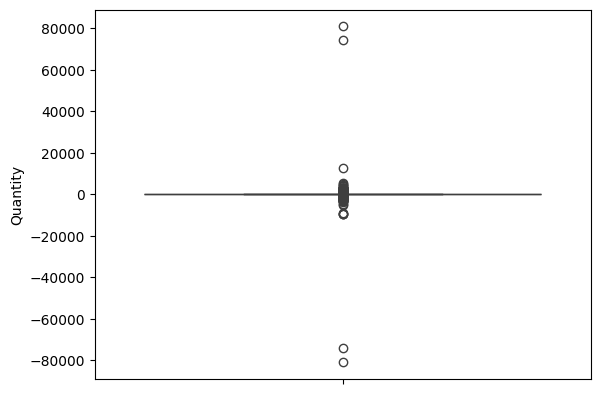

In [32]:
#outliers in quantity column of df
sns.boxplot(df['Quantity'])

In [34]:

df[df['Quantity'] > 15000]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,10:01:00
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,09:15:00


These two rows of data are outliers in the quantity column

In [35]:
df[df['Quantity']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,10:24:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,09:57:00
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom,11:58:00


all the 10624 rows of quantity being negative indicates that products got returned back

In [36]:
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,10:24:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,09:57:00
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom,11:58:00


so only 9288 out of 10624 transactions are actually the cancelled ones

In [37]:
# rows where quantity is less than 0 and invoiceno doesnt starts with c in df

df[(df['Quantity'] < 0) & (~df['InvoiceNo'].str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
2406,536589,21777,Unknown,-10,2010-12-01,0.0,Unknown,United Kingdom,16:50:00
4347,536764,84952C,Unknown,-38,2010-12-02,0.0,Unknown,United Kingdom,14:42:00
7188,536996,22712,Unknown,-20,2010-12-03,0.0,Unknown,United Kingdom,15:30:00
7189,536997,22028,Unknown,-20,2010-12-03,0.0,Unknown,United Kingdom,15:30:00
7190,536998,85067,Unknown,-6,2010-12-03,0.0,Unknown,United Kingdom,15:30:00
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07,0.0,Unknown,United Kingdom,18:36:00
535335,581212,22578,lost,-1050,2011-12-07,0.0,Unknown,United Kingdom,18:38:00
535336,581213,22576,check,-30,2011-12-07,0.0,Unknown,United Kingdom,18:38:00
536908,581226,23090,missing,-338,2011-12-08,0.0,Unknown,United Kingdom,09:56:00


these 1336 rows where Invoice doesnt show cancelled but quantity being negative indicates these can be the cases where product is lost,missing or smashed when observed the description

In [61]:
# exclude df[(df['Quantity'] < 0) & (~df['InvoiceNo'].str.startswith('C'))] from df2
df2 = df2[~((df2['Quantity'] < 0) & (df2['InvoiceNo'].str.startswith('C')))]

In [62]:

df2[(df2['Quantity'] < 0) & (df2['InvoiceNo'].str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


In [43]:
df2.shape

(530104, 9)

In [44]:
#check for duplicates in df
df.duplicated().sum()

5268

In [65]:
df2.duplicated().sum()

0

In [64]:
df2 = df2.drop_duplicates()

In [66]:
#rows where unitprice is greater than 20000 in df2
df2[df2['UnitPrice'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


In [67]:
df2[df2['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


In [68]:
#remove the rows where unitprice is greater than 20000  and less than 0 in df2
df2 = df2[df2['UnitPrice'] > 0]
df2 = df2[df2['UnitPrice'] < 20000]

In [69]:
df2.describe()

,Quantity,UnitPrice
count,524878.000000,524878.000000
mean,10.616600,3.922573
std,156.280031,36.093028
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


In [70]:
df2.shape

(524878, 9)

In [71]:
df2[df2['Quantity']>20000]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,10:01:00
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,09:15:00


In [79]:
#exclude df2['Quantity']>20000 from df2
df2 = df2[df2['Quantity']<20000]

In [80]:
df2[df2['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


In [82]:
#Count of Unique InvoiceNo
df2['InvoiceNo'].nunique()

19958

In [83]:
df2['StockCode'].nunique()

3921

In [84]:
df['Country'].nunique()

38

In [85]:
df['CustomerID'].nunique()

4373

<Axes: >

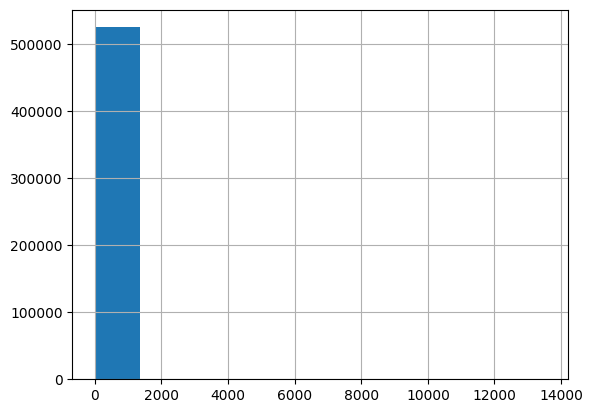

In [86]:
#plot a histogram for unitprice column
df2['UnitPrice'].hist()

In [87]:
#count of rows where unitprice<10
df2[df2['UnitPrice'] < 10].shape


(500981, 9)



---
most of the data lies where unitprice is less than 10


---




<Axes: >

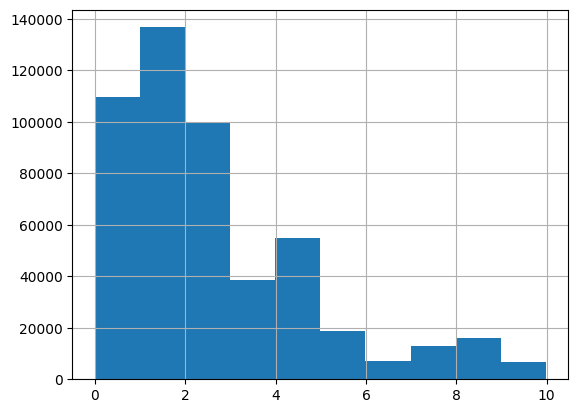

In [88]:
#plot histogram on unitprice of df2 where unitprice<5
df2[df2['UnitPrice'] < 10]['UnitPrice'].hist()

<Axes: >

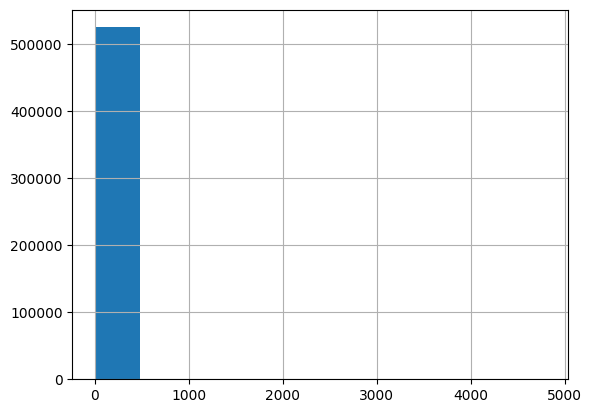

In [89]:
#plot a histogram for column quantity
df2['Quantity'].hist()

In [96]:
#display no.of rows where quantity is between -1500 and 30
df2[ (df2['Quantity'] < 30)].shape

(498102, 9)

<Axes: >

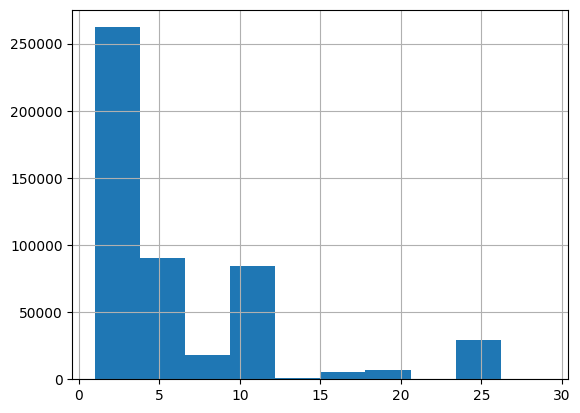

In [92]:

df2[ (df2['Quantity'] < 30)]['Quantity'].hist()

<Axes: >

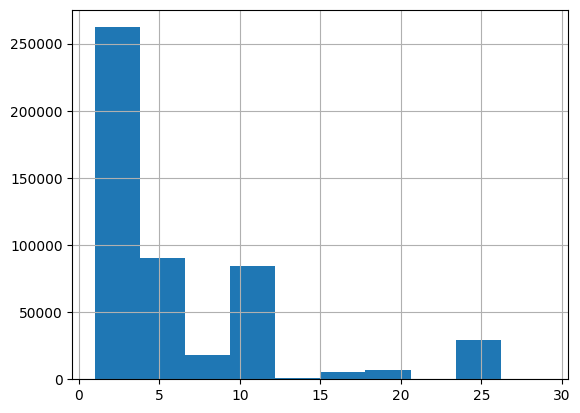

In [93]:

df2[ (df2['Quantity'] < 30)]['Quantity'].hist()

<Axes: >

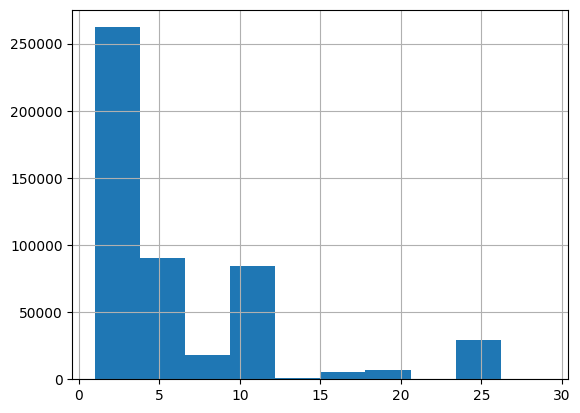

In [94]:

df2[ (df2['Quantity'] < 30)]['Quantity'].hist()



---
most of the data lies in the area <= 30 in quantity column of df2


---




In [98]:
#rows in df2 where quantity is less than 0 and invoiceno doesnt have c
df2[(df2['Quantity'] < 0) & (~df2['InvoiceNo'].str.startswith('C'))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


In [101]:
df2[(df2['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime


<Axes: >

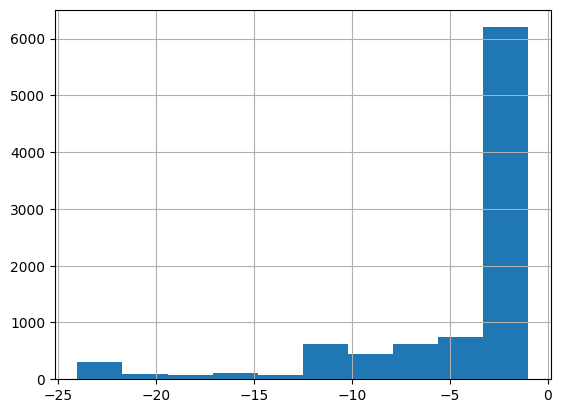

In [99]:
df[(df['Quantity'] > -25) & (df['Quantity'] < 0)]['Quantity'].hist()

The above is histogram for cancelled transactions in df because in df2 we got rid of outliers,missing data and duplicates and also transactions related to free products and cancelled transactions because we would further use df2 to calculate revenue etc

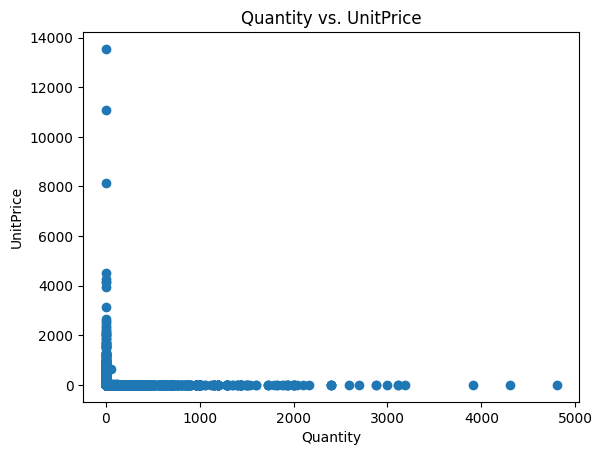

In [102]:

import matplotlib.pyplot as plt

# Scatter plot between Quantity and UnitPrice
plt.scatter(df2['Quantity'], df2['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity vs. UnitPrice')
plt.show()




In [103]:
# Correlation matrix for numerical variables
df2[['Quantity', 'UnitPrice']].corr()


,Quantity,UnitPrice
Quantity,1.00000,-0.01511
UnitPrice,-0.01511,1.00000




---
Since the correlation between Quantity and UnitPrice is close to 0, it suggests that changes in the quantity of items sold are not strongly influenced by the price of the items.Negative sign (-): Suggests that, as the quantity increases, the unit price might decrease slightly, but this effect is very minimal given how close it is to 0 because it is wholesale data

---




<Axes: xlabel='InvoiceDate'>

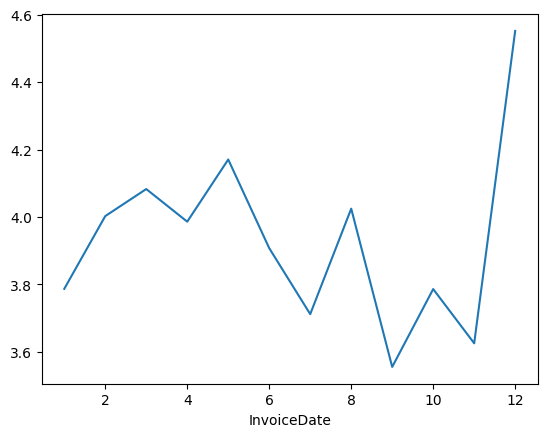

In [107]:
#plot unitprice over every month in invoicedate
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2.groupby(df2['InvoiceDate'].dt.month)['UnitPrice'].mean().plot()

<Axes: xlabel='InvoiceDate'>

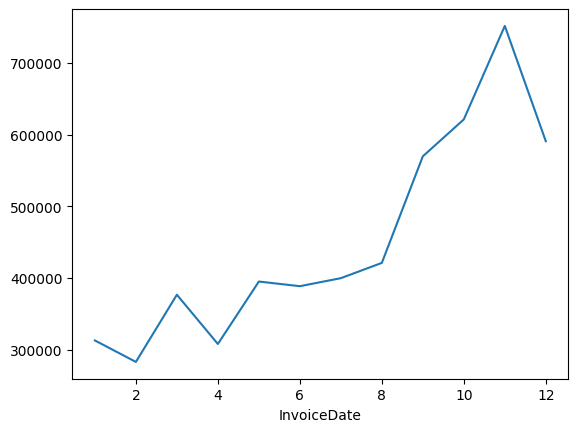

In [108]:
df2.groupby(df2['InvoiceDate'].dt.month)['Quantity'].sum().plot()

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524876 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        524876 non-null  category      
 1   StockCode        524876 non-null  category      
 2   Description      524876 non-null  string        
 3   Quantity         524876 non-null  int64         
 4   InvoiceDate      524876 non-null  datetime64[ns]
 5   UnitPrice        524876 non-null  float64       
 6   CustomerID       524876 non-null  category      
 7   Country          524876 non-null  category      
 8   TransactionTime  524876 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(1), string(1)
memory usage: 29.1+ MB


In [114]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,08:26:00


In [118]:
df2['Revenue'] = df2['Quantity'] * df2['UnitPrice']


In [120]:
# Extracting the day of the week (0 = Monday, 6 = Sunday)
df2['DayOfWeek'] = df2['InvoiceDate'].dt.dayofweek

# Counting transactions per day of the week
transactions_by_day = df2['DayOfWeek'].value_counts().sort_index()

#  mapping the day numbers to names for better readability
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
transactions_by_day.index = transactions_by_day.index.map(day_map)

print(transactions_by_day)

DayOfWeek
Monday        92466
Tuesday       98725
Wednesday     91467
Thursday     100213
Friday        79666
Sunday        62339
Name: count, dtype: int64


In [126]:
# Converting the datetime.time objects to strings before applying pd.to_datetime
df2['TransactionTime'] = df2['TransactionTime'].astype(str)

#  converting the strings to datetime objects
df2['TransactionTime'] = pd.to_datetime(df2['TransactionTime'], format='%H:%M:%S')
df2['Hour'] = df2['TransactionTime'].dt.hour

# Counting transactions per hour
transactions_by_hour = df2['Hour'].value_counts().sort_index()

print(transactions_by_hour)

Hour
6         1
7       379
8      8797
9     33683
10    47596
11    55420
12    75986
13    69993
14    65057
15    75665
16    52992
17    27426
18     7676
19     3427
20      778
Name: count, dtype: int64


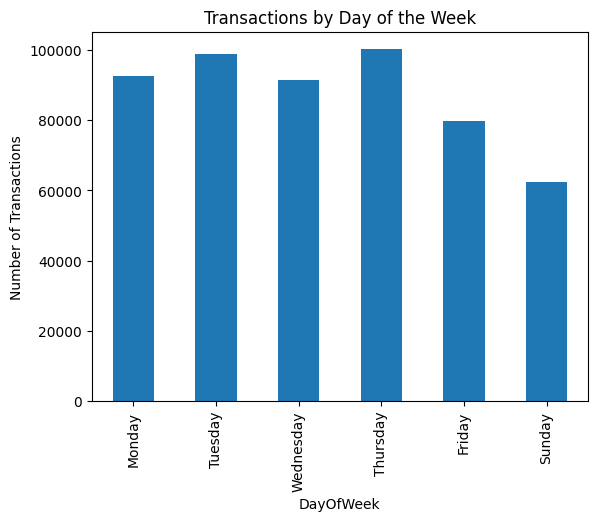

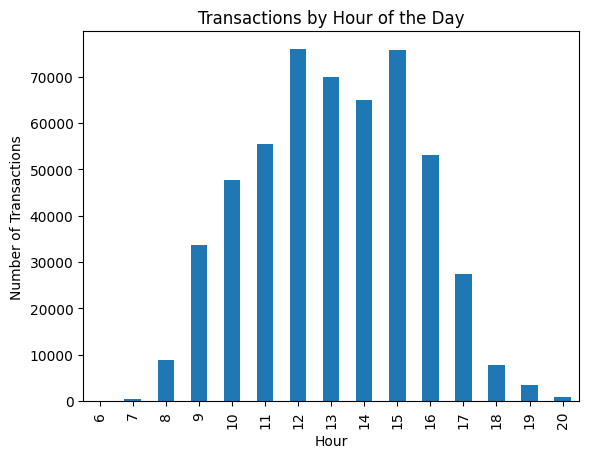

In [127]:
import matplotlib.pyplot as plt

# Plotting transactions by day of the week
transactions_by_day.plot(kind='bar', title='Transactions by Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

# Plotting transactions by hour
transactions_by_hour.plot(kind='bar', title='Transactions by Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

In [129]:
# rows where customerID is unknown
df2[df2['CustomerID'] == 'Unknown']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionTime,Revenue,DayOfWeek,Hour
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01,2.51,Unknown,United Kingdom,1900-01-01 14:32:00,2.51,2,14
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01,2.51,Unknown,United Kingdom,1900-01-01 14:32:00,5.02,2,14
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01,0.85,Unknown,United Kingdom,1900-01-01 14:32:00,3.40,2,14
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01,1.66,Unknown,United Kingdom,1900-01-01 14:32:00,3.32,2,14
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01,1.66,Unknown,United Kingdom,1900-01-01 14:32:00,14.94,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09,4.13,Unknown,United Kingdom,1900-01-01 10:26:00,20.65,4,10
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09,4.13,Unknown,United Kingdom,1900-01-01 10:26:00,16.52,4,10
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09,4.96,Unknown,United Kingdom,1900-01-01 10:26:00,4.96,4,10
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09,10.79,Unknown,United Kingdom,1900-01-01 10:26:00,10.79,4,10


lets create df3 where we have all the data in df2 except these 132186 rows where customerid is unknown which is irrelevant for rfm analysis

In [135]:
# create df3 as a copy of df2 and remove rows where df2['CustomerID'] == 'Unknown'
df3 = df2.copy()
df3 = df3[df3['CustomerID'] != 'Unknown']

In [136]:

df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

recent_date = df3['InvoiceDate'].max()



# Removing rows with non-positive Quantity or TotalPrice
df_clean = df3[(df3['Quantity'] > 0) & (df3['Revenue'] > 0)]

# Group by CustomerID and calculating Recency, Frequency, and Monetary
df_rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()


df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Dropping rows where Recency is NaN
df_rfm = df_rfm.dropna(subset=['Recency'])


df_rfm.head()


<ipython-input-136-c9fff279fce3>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rfm = df_clean.groupby('CustomerID').agg({


  CustomerID  Recency  Frequency  Monetary
1    12347.0      2.0          7   4310.00
2    12348.0     75.0          4   1797.24
3    12349.0     18.0          1   1757.55
4    12350.0    310.0          1    334.40
5    12352.0     36.0          8   2506.04


In [137]:


#Defining custom bins
recency_bins = [0, 30, 60, 90, 9999]  # Recency ranges
frequency_bins = [0, 1, 5, 10, 9999]  # Frequency ranges
monetary_bins = [0, 100, 500, 1000, 99999]  # Monetary ranges

#Categorizing R, F, and M using cut
df_rfm['R_Score'] = pd.cut(df_rfm['Recency'], bins=recency_bins, labels=range(4, 0, -1), right=False)
df_rfm['F_Score'] = pd.cut(df_rfm['Frequency'], bins=frequency_bins, labels=range(1, 5), right=False)
df_rfm['M_Score'] = pd.cut(df_rfm['Monetary'], bins=monetary_bins, labels=range(1, 5), right=False)

df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

print(df_rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())


  CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
1    12347.0      2.0          7   4310.00       4       3       4       434
2    12348.0     75.0          4   1797.24       2       2       4       224
3    12349.0     18.0          1   1757.55       4       2       4       424
4    12350.0    310.0          1    334.40       1       2       2       122
5    12352.0     36.0          8   2506.04       3       3       4       334


Loyal Customers (high F, M, and recent R).
Big Spenders (high M, regardless of R and F).
New Customers (recent R, lower F and M).

In [138]:
high_rfm_customers = df_rfm[
    (df_rfm['R_Score'] == 4) &  # Most recent
    (df_rfm['F_Score'] == 4) &  # Most frequent
    (df_rfm['M_Score'] == 4)    # Highest spending
]

In [151]:
high_rfm_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
15,12362.0,3.0,10,5226.23,4,4,4,444
39,12395.0,19.0,12,3018.63,4,4,4,444
75,12437.0,1.0,18,4951.41,4,4,4,444
100,12471.0,2.0,30,19788.65,4,4,4,444
103,12474.0,17.0,18,7324.09,4,4,4,444
...,...,...,...,...,...,...,...,...
4324,18223.0,4.0,14,6484.54,4,4,4,444
4326,18225.0,3.0,12,5504.96,4,4,4,444
4330,18229.0,11.0,20,7276.90,4,4,4,444
4340,18241.0,9.0,17,2073.09,4,4,4,444


we have 338 loyal customers

In [148]:
big_spenders = df_rfm[(df_rfm['M_Score'] == 4)]

In [149]:
big_spenders

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
1,12347.0,2.0,7,4310.00,4,3,4,434
2,12348.0,75.0,4,1797.24,2,2,4,224
3,12349.0,18.0,1,1757.55,4,2,4,424
5,12352.0,36.0,8,2506.04,3,3,4,334
7,12354.0,232.0,1,1079.40,1,2,4,124
...,...,...,...,...,...,...,...,...
4353,18260.0,172.0,6,2628.35,1,3,4,134
4356,18263.0,25.0,3,1213.16,4,2,4,424
4361,18272.0,2.0,6,3078.58,4,3,4,434
4370,18283.0,3.0,16,2045.53,4,4,4,444


we have 1656 Big Spenders

In [160]:
df_rfm['Country'] = df3['Country']
df_rfm['Quantity'] = df3['Quantity']
df_rfm['Description'] = df3['Description']

In [166]:
# Group by Country and aggregating the metrics
country_analysis = df_rfm.groupby('Country').agg({
    'Monetary': 'sum',         # Total revenue
    'Quantity': 'sum',         # Total quantity sold
    'Frequency': 'count'       # Total transactions
}).reset_index()

country_analysis.columns = ['Country', 'Total Revenue', 'Total Quantity', 'Total Transactions']

top_countries = country_analysis.sort_values(by='Total Revenue', ascending=False).head(5)

top_countries


<ipython-input-166-b14646c903cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_analysis = df_rfm.groupby('Country').agg({


,Country,Total Revenue,Total Quantity,Total Transactions
36,United Kingdom,5730125.233,33595.0,2917
25,Norway,249920.450,1852.0,73
10,EIRE,36517.940,243.0,21
13,France,29432.510,449.0,20
0,Australia,27711.280,107.0,14


In [165]:
# Group by Description and aggregating the metrics
description_analysis = df_rfm.groupby('Description').agg({
    'Monetary': 'sum',         # Total revenue generated by the product
    'Quantity': 'sum',         # Total quantity sold
    'Frequency': 'count'       # Number of transactions involving the product
}).reset_index()


description_analysis.columns = ['Description', 'Total Revenue', 'Total Quantity', 'Total Transactions']


top_descriptions = description_analysis.sort_values(by='Total Revenue', ascending=False).head(5)

top_descriptions


,Description,Total Revenue,Total Quantity,Total Transactions
482,GREY FLORAL FELTCRAFT SHOULDER BAG,264466.37,6.0,4
245,CHINESE DRAGON PAPER LANTERNS,194390.79,144.0,1
1129,VINTAGE BILLBOARD DRINK ME MUG,142257.97,109.0,15
488,GUMBALL MAGAZINE RACK,120001.03,4.0,2
575,KINGS CHOICE GIANT TUBE MATCHES,92147.27,19.0,3
